In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sb
import sklearn.tree as tree
import graphviz
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC

In [3]:
data = pd.read_csv('/content/drive/MyDrive/saratan/data.csv').drop(columns=['Unnamed: 0'])
labels = pd.read_csv('/content/drive/MyDrive/saratan/labels.csv').drop(columns=['Unnamed: 0'])

In [4]:
print(data)
print(labels)

     gene_0    gene_1    gene_2    gene_3     gene_4  gene_5    gene_6  \
0       0.0  2.017209  3.265527  5.478487  10.431999     0.0  7.175175   
1       0.0  0.592732  1.588421  7.586157   9.623011     0.0  6.816049   
2       0.0  3.511759  4.327199  6.881787   9.870730     0.0  6.972130   
3       0.0  3.663618  4.507649  6.659068  10.196184     0.0  7.843375   
4       0.0  2.655741  2.821547  6.539454   9.738265     0.0  6.566967   
..      ...       ...       ...       ...        ...     ...       ...   
796     0.0  1.865642  2.718197  7.350099  10.006003     0.0  6.764792   
797     0.0  3.942955  4.453807  6.346597  10.056868     0.0  7.320331   
798     0.0  3.249582  3.707492  8.185901   9.504082     0.0  7.536589   
799     0.0  2.590339  2.787976  7.318624   9.987136     0.0  9.213464   
800     0.0  2.325242  3.805932  6.530246   9.560367     0.0  7.957027   

       gene_7  gene_8  gene_9  ...  gene_20521  gene_20522  gene_20523  \
0    0.591871     0.0     0.0  ...   

In [5]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

In [6]:
print(X_train)
print(X_test)
print(y_train)
print(y_test)

     gene_0    gene_1    gene_2    gene_3     gene_4  gene_5    gene_6  \
616     0.0  5.257467  3.658154  7.475920  10.532229     0.0  6.581443   
329     0.0  3.972858  3.368908  6.644179   9.361722     0.0  8.306344   
342     0.0  3.571592  3.900113  6.351773   9.740098     0.0  8.413133   
394     0.0  3.835964  4.914249  6.419020   9.200234     0.0  7.591784   
79      0.0  3.219029  2.284781  8.124178  10.386132     0.0  5.780310   
..      ...       ...       ...       ...        ...     ...       ...   
71      0.0  1.017138  2.526920  5.831520   9.959973     0.0  7.841583   
106     0.0  1.228542  1.880881  5.706903  10.026648     0.0  7.178426   
270     0.0  2.528396  2.620305  6.350181   9.007260     0.0  9.862189   
435     0.0  4.134196  3.722608  6.139899   9.642600     0.0  7.988401   
102     0.0  2.990483  2.487358  6.938227  10.034826     0.0  6.910541   

       gene_7  gene_8  gene_9  ...  gene_20521  gene_20522  gene_20523  \
616  0.000000     0.0     0.0  ...   

In [7]:
X_train= X_train.values
X_test= X_test.values
y_train = y_train.values.reshape(640,)
y_test = y_test.values.reshape(161,)

In [8]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train, y_train)
X_test = scaler.fit_transform(X_test, y_test)

In [9]:
print(X_train)
print(X_test)

[[0.         0.84294346 0.60330903 ... 0.63479461 0.44951174 0.        ]
 [0.         0.63697874 0.55560603 ... 0.27197346 0.91780791 0.        ]
 [0.         0.57264268 0.6432133  ... 0.32435705 0.69940163 0.        ]
 ...
 [0.         0.4053844  0.43214513 ... 0.28595653 0.33884298 0.        ]
 [0.         0.66284652 0.61393885 ... 0.43626284 0.54634472 0.        ]
 [0.         0.47947197 0.41021926 ... 0.46712759 0.59814325 0.        ]]
[[0.         0.54083559 0.77448688 ... 0.49091095 0.25973384 0.        ]
 [0.         0.6319108  0.56433238 ... 0.54519265 0.49523641 0.        ]
 [0.         0.73019695 0.60795954 ... 0.31654705 0.40595229 0.        ]
 ...
 [0.         0.57879641 0.70998592 ... 0.25684668 0.39175171 0.        ]
 [0.         0.41756634 0.45491806 ... 0.48547868 0.50854688 0.        ]
 [0.         0.52222106 0.45699308 ... 0.29655542 0.49753333 0.        ]]


In [10]:
lda = LinearDiscriminantAnalysis(n_components=4)
lda.fit(X_train, y_train)
X_train = lda.transform(X_train)
X_test = lda.transform(X_test)

In [11]:
print(X_train)
print(X_test)

[[-1.4370783   4.46197944  2.23896876  0.1695975 ]
 [-2.20933446  6.5683174   4.39574855  1.86167201]
 [-2.36133411  5.36667453  3.36748834  1.95082708]
 ...
 [12.5393993  -4.24721023  1.60551812  1.12869146]
 [10.04400995 -4.05850262  0.9470645   1.32632865]
 [-2.73890382  4.52029356  3.36611525  1.84720654]]
[[ 8.65071441e-01  3.33632933e+00 -5.68964541e+00 -1.13171267e+01]
 [-2.37497645e+00  8.01384653e+00  3.18416173e+00  1.21965830e+00]
 [ 9.31824562e-01  3.09127779e+00 -3.75977385e+00 -1.09079356e+01]
 [ 1.35617238e+01 -4.41711296e+00  1.68020891e+00  6.80215855e-01]
 [-1.99647112e+00  4.37912786e+00  2.80838017e+00  1.00263634e+00]
 [-3.09487294e+00  6.93872851e+00  2.62158136e+00  9.27314688e-02]
 [-1.21823333e+00  7.20516235e+00  2.77269314e+00  5.73203123e-01]
 [-3.38060041e-01  1.71515856e+00 -1.62041531e+01  6.93297592e+00]
 [-8.21079416e+00 -9.11821053e+00  6.36059035e-01 -5.33755111e-02]
 [-3.10412174e-02  2.80733329e+00 -4.24067520e+00 -9.43987343e+00]
 [-1.05977018e+00 

X_train correlation matrix:


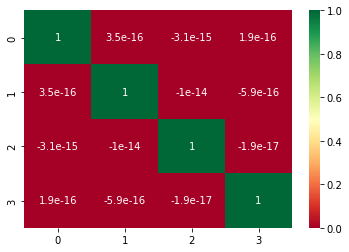

In [12]:
X_train_df = pd.DataFrame(X_train)
corr_mat = X_train_df.corr()
dataplot = sb.heatmap(corr_mat, cmap="RdYlGn", annot=True)
print('X_train correlation matrix:')
plt.show()

X_test correlation matrix:


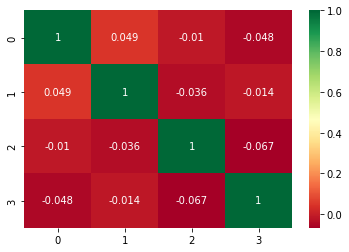

In [13]:
X_test_df = pd.DataFrame(X_test)
corr_mat = X_test_df.corr()
dataplot = sb.heatmap(corr_mat, cmap="RdYlGn", annot=True)
print('X_test correlation matrix:')
plt.show()

In [14]:
lr = LogisticRegression(solver='saga', random_state=42, max_iter=700)
lr.fit(X_train, y_train)
y_pred_test = lr.predict(X_test)

print('Test set confusion matrix:')
cm = confusion_matrix(y_test, y_pred_test)
print(cm)
print('Accuracy:')
print(cm.trace() / cm.sum())
print()
y_pred_train = lr.predict(X_train)
print('Train set confusion matrix:')
cm = confusion_matrix(y_train, y_pred_train)
print(cm)
print('Accuracy:')
print(cm.trace() / cm.sum())

Test set confusion matrix:
[[61  0  0  0  0]
 [ 0 17  0  0  0]
 [ 0  0 25  0  0]
 [ 0  0  0 29  0]
 [ 0  0  0  0 29]]
Accuracy:
1.0

Train set confusion matrix:
[[239   0   0   0   0]
 [  0  61   0   0   0]
 [  0   0 121   0   0]
 [  0   0   0 112   0]
 [  0   0   0   0 107]]
Accuracy:
1.0


In [15]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred_test = gnb.predict(X_test)
print('Test set confusion matrix:')
cm = confusion_matrix(y_test, y_pred_test)
print(cm)
print('Accuracy:')
print(cm.trace() / cm.sum())
print()
y_pred_train = gnb.predict(X_train)
print('Train set confusion matrix:')
cm = confusion_matrix(y_train, y_pred_train)
print(cm)
print('Accuracy:')
print(cm.trace() / cm.sum())

Test set confusion matrix:
[[61  0  0  0  0]
 [ 0 17  0  0  0]
 [ 0  0 25  0  0]
 [ 0  0  0 29  0]
 [ 0  0  0  0 29]]
Accuracy:
1.0

Train set confusion matrix:
[[238   0   0   1   0]
 [  0  60   0   1   0]
 [  0   0 121   0   0]
 [  0   0   0 112   0]
 [  0   0   0   0 107]]
Accuracy:
0.996875


In [16]:
dtc = tree.DecisionTreeClassifier(criterion='entropy')
dtc.fit(X_train, y_train)
y_pred_test = dtc.predict(X_test)
print('Test set confusion matrix:')
cm = confusion_matrix(y_test, y_pred_test)
print(cm)
print('Accuracy:')
print(cm.trace() / cm.sum())
print()
y_pred_train = dtc.predict(X_train)
print('Train set confusion matrix:')
cm = confusion_matrix(y_train, y_pred_train)
print(cm)
print('Accuracy:')
print(cm.trace() / cm.sum())

Test set confusion matrix:
[[61  0  0  0  0]
 [ 0 17  0  0  0]
 [ 0  0 25  0  0]
 [ 0  0  0 29  0]
 [ 0  0  0  0 29]]
Accuracy:
1.0

Train set confusion matrix:
[[239   0   0   0   0]
 [  0  61   0   0   0]
 [  0   0 121   0   0]
 [  0   0   0 112   0]
 [  0   0   0   0 107]]
Accuracy:
1.0


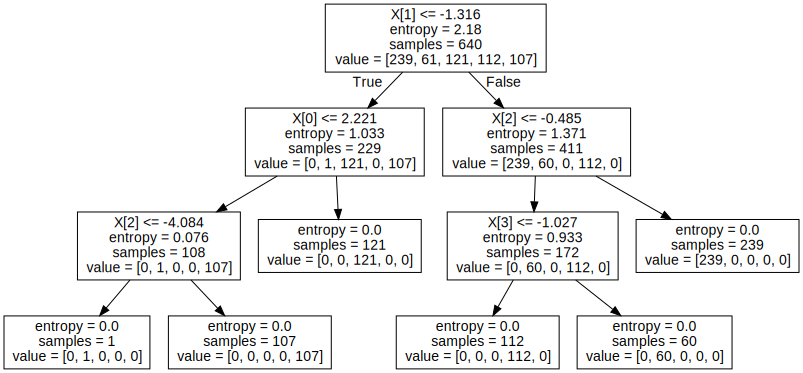

In [17]:
dot_data = tree.export_graphviz(dtc, out_file=None) 
graph = graphviz.Source(dot_data) 
graph

In [18]:
svc = SVC()
svc.fit(X_train, y_train)
y_pred_test = svc.predict(X_test)
print('Test set confusion matrix:')
cm = confusion_matrix(y_test, y_pred_test)
print(cm)
print('Accuracy:')
print(cm.trace() / cm.sum())
print()
y_pred_train = svc.predict(X_train)
print('Train set confusion matrix:')
cm = confusion_matrix(y_train, y_pred_train)
print(cm)
print('Accuracy:')
print(cm.trace() / cm.sum())

Test set confusion matrix:
[[61  0  0  0  0]
 [ 0 17  0  0  0]
 [ 0  0 25  0  0]
 [ 0  0  0 29  0]
 [ 0  0  0  0 29]]
Accuracy:
1.0

Train set confusion matrix:
[[239   0   0   0   0]
 [  0  61   0   0   0]
 [  0   0 121   0   0]
 [  0   0   0 112   0]
 [  0   0   0   0 107]]
Accuracy:
1.0
